In [15]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import Sequential 
from keras.datasets import mnist
from keras.utils import to_categorical

In [16]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

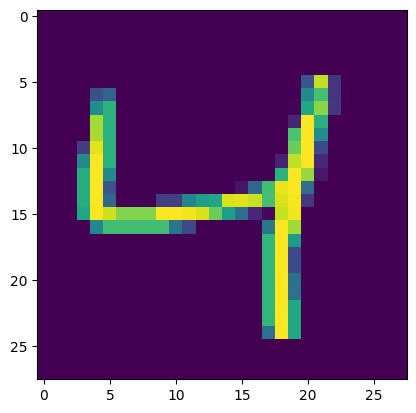

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
model=Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [21]:
X_train=X_train.reshape((60000,28,28,1))
X_train=X_train.astype('float32')/255
X_test=X_test.reshape((10000,28,28,1))
X_test=X_test.astype('float32')/255
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)

In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=64)

test_acc=model.evaluate(X_test,y_test)
print(test_acc)

Epoch 1/5
938/938 [==============================] - 48s 14ms/step - loss: 0.8710 - accuracy: 0.7067
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.2002 - accuracy: 0.9377
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1112 - accuracy: 0.9650
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0822 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0506 - accuracy: 0.9822
[0.05064031854271889, 0.982200026512146]


In [23]:
from keras.models import load_model
model.save('mnist.h5')